<a href="https://colab.research.google.com/github/sandeep1847e/Neural_Network_1/blob/main/Star_Classification_Using_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
# !pip install uproot

In [166]:
# import uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler ,LabelEncoder
from sklearn.metrics import accuracy_score ,confusion_matrix ,classification_report,recall_score
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [167]:
import gdown
url = "https://swmukher.web.cern.ch/swmukher/dataset_star.csv"
output = 'star_data.csv'
gdown.download(url, output, quiet=True)

df=pd.read_csv("star_data.csv")
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [168]:
(df["Color"].unique())

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [169]:
print(df)

     Temperature              L          R    A_M  Color Spectral_Class  Type
0           3068       0.002400     0.1700  16.12    Red              M     0
1           3042       0.000500     0.1542  16.60    Red              M     0
2           2600       0.000300     0.1020  18.70    Red              M     0
3           2800       0.000200     0.1600  16.65    Red              M     0
4           1939       0.000138     0.1030  20.06    Red              M     0
..           ...            ...        ...    ...    ...            ...   ...
235        38940  374830.000000  1356.0000  -9.93   Blue              O     5
236        30839  834042.000000  1194.0000 -10.63   Blue              O     5
237         8829  537493.000000  1423.0000 -10.73  White              A     5
238         9235  404940.000000  1112.0000 -11.23  White              A     5
239        37882  294903.000000  1783.0000  -7.80   Blue              O     5

[240 rows x 7 columns]


**Ans 1**

In [170]:
"No. of training examples=",len(df)

('No. of training examples=', 240)

**Ans 2**

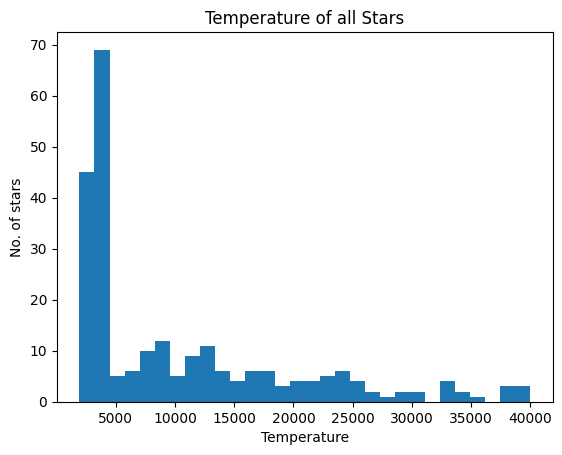

In [171]:
plt.hist(df["Temperature"],bins=30)
plt.title("Temperature of all Stars")
plt.xlabel("Temperature")
plt.ylabel("No. of stars")
plt.show()

**Ans 3**

In [172]:
type_0 = df[df['Type']==0]
type_1 = df[df['Type']==1]
type_2 = df[df['Type']==2]
type_3 = df[df['Type']==3]
type_4 = df[df['Type']==4]
type_5 = df[df['Type']==5]

In [173]:
type_0

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
5,2840,0.000650,0.1100,16.98,Red,M,0
6,2637,0.000730,0.1270,17.22,Red,M,0
7,2600,0.000400,0.0960,17.40,Red,M,0
8,2650,0.000690,0.1100,17.45,Red,M,0
9,2700,0.000180,0.1300,16.05,Red,M,0


In [174]:
type_5

,Temperature,L,R,A_M,Color,Spectral_Class,Type
50,3490,270000.0,1520.0,-9.40,Red,M,5
51,3750,283000.0,1260.0,-7.63,Red,M,5
52,3834,272000.0,1183.0,-9.20,Red,M,5
53,3749,550000.0,1648.0,-8.05,Orange,M,5
54,3650,310000.0,1324.0,-7.79,Red,M,5
55,3450,263000.0,1349.0,-11.75,Red,M,5
56,3660,363000.0,1673.0,-11.92,Red,M,5
57,3450,174000.0,1284.0,-11.28,Red,M,5
58,3752,209000.0,955.0,-11.24,Red,M,5
59,3535,195000.0,1546.0,-11.36,Red,M,5


In [175]:
len(type_0),len(type_5)
type_5['Temperature'].unique().shape

(39,)

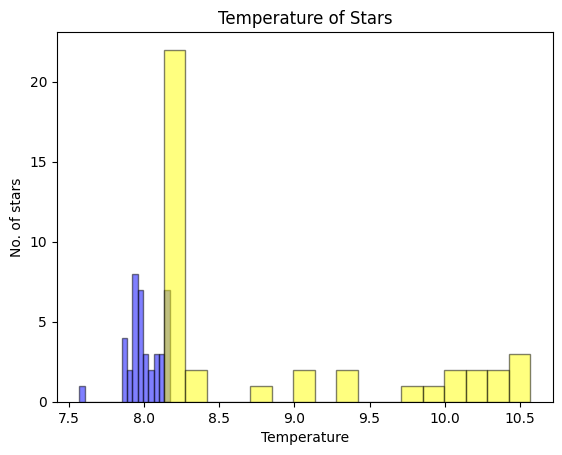

In [176]:
plt.hist(np.log(type_0['Temperature']),color='blue',rwidth=1.5,alpha=0.5,bins=17,edgecolor='black')
plt.hist(np.log(type_5['Temperature']),color='yellow',alpha=0.5,bins=17,edgecolor='black',rwidth=1.5)
# plt.xscale('log')
plt.title("Temperature of Stars")
plt.xlabel("Temperature")
plt.ylabel("No. of stars")
plt.show()

**Ans 4**

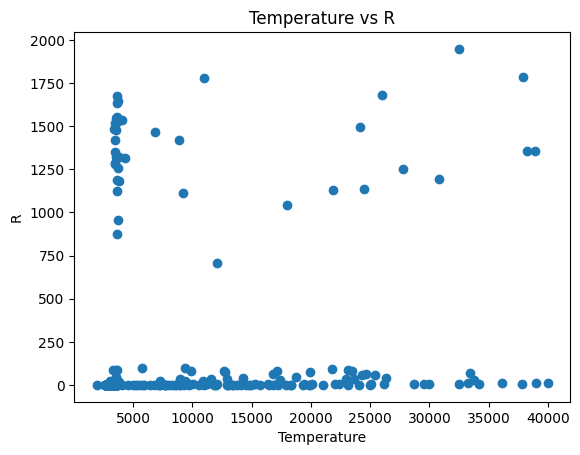

In [177]:
plt.scatter(df["Temperature"],df["R"])
plt.title("Temperature vs R")
plt.xlabel("Temperature")
plt.ylabel("R")
# plt.yscale('log')
plt.show()
# plt.scatter([1,2,3],[1,4,9])

**Ans 5**

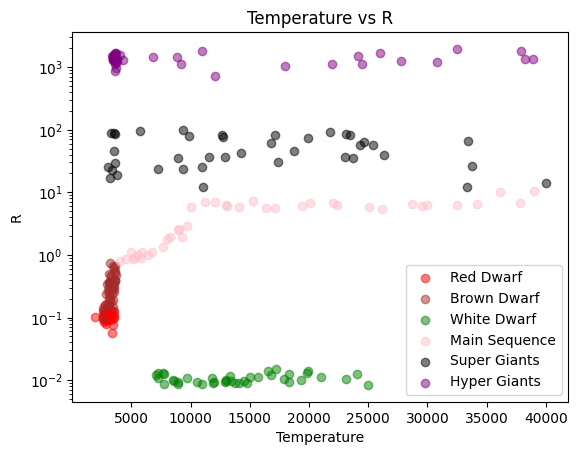

In [178]:
plt.scatter(type_0["Temperature"],type_0["R"],color='Red',alpha=0.5,label='Red Dwarf')
plt.scatter(type_1["Temperature"],type_1["R"],color='Brown',alpha=0.5,label='Brown Dwarf ')
plt.scatter(type_2["Temperature"],type_2["R"],color='green',alpha=0.5,label='White Dwarf')
plt.scatter(type_3["Temperature"],type_3["R"],color='pink',alpha=0.5,label='Main Sequence')
plt.scatter(type_4["Temperature"],type_4["R"],color='Black',alpha=0.5,label='Super Giants')
plt.scatter(type_5["Temperature"],type_5["R"],color='purple',alpha=0.5,label='Hyper Giants')
plt.legend()
plt.title("Temperature vs R")
plt.xlabel("Temperature")
plt.ylabel("R")
plt.yscale('log')
plt.show()

**Ans 6**

In [179]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [180]:
df['Spectral_Class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [181]:
# df['Spectral_Class_encoded'] = LabelEncoder().fit_transform(df['Spectral_Class'])
df['Spectral_Class'] = LabelEncoder().fit_transform(df['Spectral_Class'])
df['Color'] = LabelEncoder().fit_transform(df['Color'])

# df.drop(columns=['Spectral_Class_encoded'],inplace=True)

In [182]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


In [183]:
df['Spectral_Class'].unique(),df['Color'].unique()

(array([5, 1, 0, 2, 6, 4, 3]),
 array([ 8,  1,  9, 13,  2,  7,  0,  4, 11, 15,  5, 10, 14, 16, 12,  6,  3]))

In [184]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,8,5,0
1,3042,0.000500,0.1542,16.60,8,5,0
2,2600,0.000300,0.1020,18.70,8,5,0
3,2800,0.000200,0.1600,16.65,8,5,0
4,1939,0.000138,0.1030,20.06,8,5,0


**we see that input feature values are quite distinct from each other so we can normalise them**


  **these are the input features**
  * L : Relative luminosity of the star with respect to the sun
  * R : Relative radius of the star with respect to the sun.
  *A_M: Absolute magnitude of the star.
  *Color (this is a non-numerical feature)
  *Spectral_Class (this is a non-numerical feature)
  *Temperature : Average temperature measured in Kelvin.

**we see that feature values are quite distinct from each other so we can scale our data**

In [186]:
Ifeatures=['Temperature','L','R','A_M','Color','Spectral_Class']
df[Ifeatures]=StandardScaler().fit_transform(df[Ifeatures])
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,-0.779382,-0.598624,-0.459210,1.116745,0.531788,0.595338,0
1,-0.782110,-0.598624,-0.459241,1.162414,0.531788,0.595338,0
2,-0.828477,-0.598624,-0.459342,1.362213,0.531788,0.595338,0
3,-0.807496,-0.598624,-0.459229,1.167171,0.531788,0.595338,0
4,-0.897819,-0.598624,-0.459340,1.491607,0.531788,0.595338,0


In [187]:
X=df[Ifeatures]
Y=df['Type']

In [188]:
X,Y


(     Temperature         L         R       A_M     Color  Spectral_Class
 0      -0.779382 -0.598624 -0.459210  1.116745  0.531788        0.595338
 1      -0.782110 -0.598624 -0.459241  1.162414  0.531788        0.595338
 2      -0.828477 -0.598624 -0.459342  1.362213  0.531788        0.595338
 3      -0.807496 -0.598624 -0.459229  1.167171  0.531788        0.595338
 4      -0.897819 -0.598624 -0.459340  1.491607  0.531788        0.595338
 ..           ...       ...       ...       ...       ...             ...
 235     2.983743  1.494720  2.167974 -1.361718 -1.373124        1.074805
 236     2.133913  4.059319  1.854068 -1.428317 -1.373124        1.074805
 237    -0.175029  2.403157  2.297800 -1.437832  0.769902       -1.801997
 238    -0.132438  1.662878  1.695177 -1.485403  0.769902       -1.801997
 239     2.872754  1.048345  2.995370 -1.159064 -1.373124        1.074805
 
 [240 rows x 6 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 235    5
 236    5
 237 

**we need to convert our output feature in one-hot encoded format as we have multi-class classification problem**

In [189]:
# one-hots encoding
Y=to_categorical(Y,num_classes=6)

In [190]:
Y

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

**Ans 7**

In [198]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=20)
a=[Xtrain.shape ,Xtest.shape,Ytrain.shape,Ytest.shape]
b=['Xtrain','Xtest','Ytrain','Ytest']

for a,i in enumerate(a):
  print(f'{b[a]} = {i}')


Xtrain = (192, 6)
Xtest = (48, 6)
Ytrain = (192, 6)
Ytest = (48, 6)


**Ans 8**

fully connected NN using Keras

In [247]:
model=Sequential()
model.add(Dense(32,input_dim=Xtrain.shape[1],activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(6,activation='softmax'))




/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Ans 9**

In [248]:
# 64*5

In [249]:
model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_39 (Dense)                     │ (None, 32)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 6)                   │             102 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 854 (3.34 KB)

 Trainable params: 854 (3.34 KB)

 Non-trainable params: 0 (0.00 B)

**we have a total of 854 parameters**


In [250]:
print(f'weights={32*6+16*32+6*16} \nBiases= {32+16+6}')

weights=800 
Biases= 54


**Ans 10**

In [251]:
model.compile(optimizer='adam',loss='categorical_crossentropy',
              metrics=['accuracy','recall']
              )
history=model.fit(Xtrain,Ytrain,
                  epochs=70,batch_size=64,
                  validation_data=(Xtest,Ytest),
                  verbose=2
                  )

Epoch 1/70
3/3 - 2s - 664ms/step - accuracy: 0.3594 - loss: 1.8090 - recall: 0.0052 - val_accuracy: 0.3750 - val_loss: 1.8374 - val_recall: 0.0000e+00
Epoch 2/70
3/3 - 0s - 56ms/step - accuracy: 0.3750 - loss: 1.7679 - recall: 0.0104 - val_accuracy: 0.3958 - val_loss: 1.7954 - val_recall: 0.0000e+00
Epoch 3/70
3/3 - 0s - 30ms/step - accuracy: 0.3906 - loss: 1.7259 - recall: 0.0104 - val_accuracy: 0.3958 - val_loss: 1.7557 - val_recall: 0.0000e+00
Epoch 4/70
3/3 - 0s - 46ms/step - accuracy: 0.3906 - loss: 1.6867 - recall: 0.0156 - val_accuracy: 0.4583 - val_loss: 1.7169 - val_recall: 0.0000e+00
Epoch 5/70
3/3 - 0s - 44ms/step - accuracy: 0.4896 - loss: 1.6483 - recall: 0.0208 - val_accuracy: 0.6250 - val_loss: 1.6780 - val_recall: 0.0000e+00
Epoch 6/70
3/3 - 0s - 41ms/step - accuracy: 0.6458 - loss: 1.6082 - recall: 0.0208 - val_accuracy: 0.6458 - val_loss: 1.6389 - val_recall: 0.0000e+00
Epoch 7/70
3/3 - 0s - 35ms/step - accuracy: 0.6562 - loss: 1.5696 - recall: 0.0208 - val_accuracy: 

**Ans 11**

In [252]:
Ypred = model.predict(Xtest)
Ypred_classes=np.argmax(Ypred,axis=1)
Ytrue_classes=np.argmax(Ytest,axis=1)
correct=Ypred_classes == Ytrue_classes

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [253]:
correct

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

**Ans 12**

In [254]:
ConfusionMatrix=confusion_matrix(Ytrue_classes,Ypred_classes)
ConfusionMatrix

array([[ 9,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  7,  0,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  1,  0,  9]])

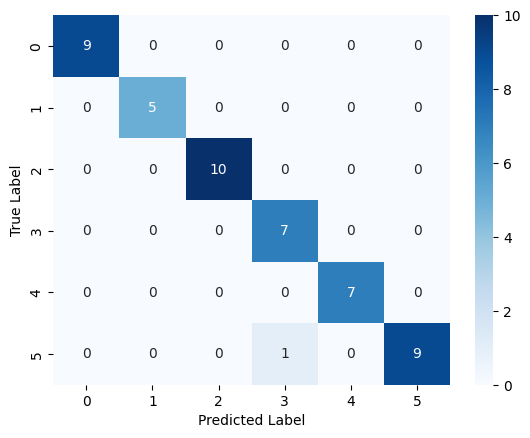

In [255]:
# giving confusion matrix a visual representation
import seaborn as sns
sns.heatmap(ConfusionMatrix,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Ans 13**

In [256]:
accuracy=accuracy_score(Ytrue_classes,Ypred_classes)
print(f"Accuracy of our model is {round(accuracy,4)*100}%")

Accuracy of our model is 97.92%


**Ans 14**

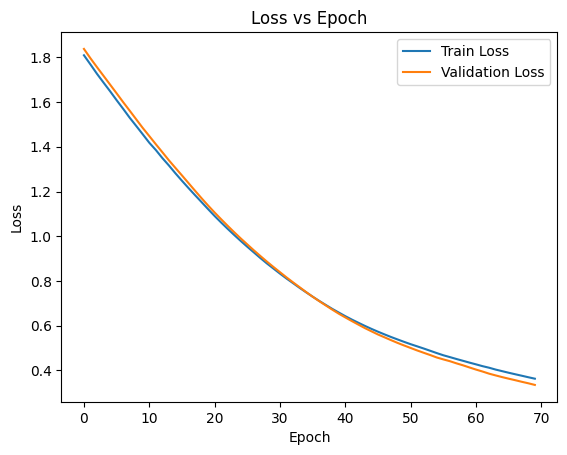

In [257]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Loss vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

**Ans 15**

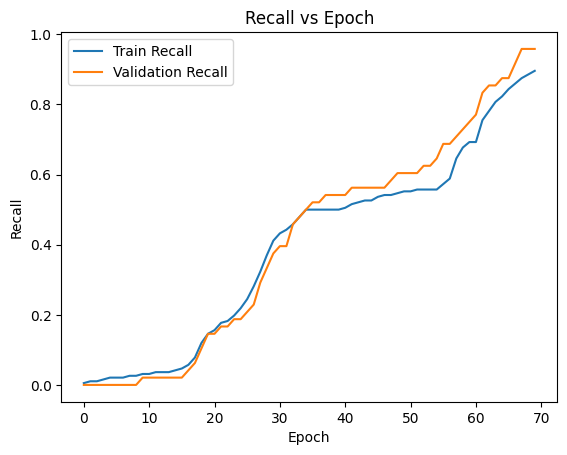

In [258]:
plt.plot(history.history['recall'], label='Train Recall')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.legend()
plt.title("Recall vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.show()